In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import datasets
import ssl
import ssl
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.optimizers import Adam, SGD




#Loading the CIFAR10 Dataset

In [13]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [63]:
x_train.shape

(50000, 32, 32, 3)

In [64]:
y_train.shape

(50000, 1)

In [65]:
x_test.shape

(10000, 32, 32, 3)

# Flatten y_train from 2-dimension to 1-dimension

In [14]:
y_train = y_train.reshape(-1)
y_test=y_test.reshape(-1)

In [4]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [30]:
def plot_sample(x,y,index):
 plt.imshow(x[index])
 plt.xlabel(classes[y[index]])

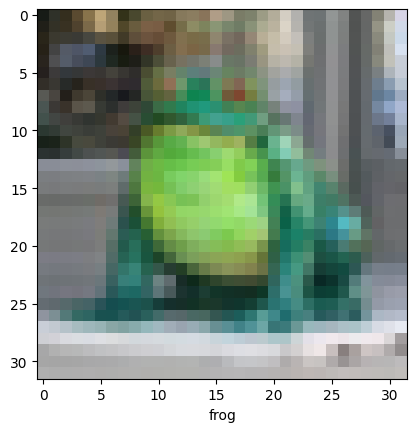

In [18]:
plot_sample(x_train,y_train,19)

#Normalizing the x data by dividing them by 255 as color code

In [15]:
x_train = x_train/255.0
x_test = x_test/255.0

# First we try with Simple ANN to see the performance, and then we add those convolutional layers

In [27]:
ann_model = Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])
ann_model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
ann_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 142s 90ms/step - loss: 2.3008 - accuracy: 0.1285
Epoch 2/5
1563/1563 [==============================] - 142s 91ms/step - loss: 2.2997 - accuracy: 0.1356
Epoch 3/5
1563/1563 [==============================] - 144s 92ms/step - loss: 2.2989 - accuracy: 0.1458
Epoch 4/5
1563/1563 [==============================] - 143s 91ms/step - loss: 2.2979 - accuracy: 0.1503
Epoch 5/5
1563/1563 [==============================] - 151s 97ms/step - loss: 2.2967 - accuracy: 0.1522


# Evaluate with test dataset

In [29]:
ann_model.evaluate(x_test,y_test)

313/313 [==============================] - 9s 27ms/step - loss: 4.3859 - accuracy: 0.1295


[4.385888576507568, 0.12950000166893005]

#Prediction

In [31]:
prediction = ann_model.predict(x_test)

313/313 [==============================] - 11s 33ms/step


In [32]:
prediction.shape

(10000, 10)

#Here we get the index of max probability in prediction for each row

In [37]:
prediction_classes = [np.argmax(element) for element in prediction]


In [50]:
print('classification Reports:\n',classification_report(y_test,prediction_classes))

classification Reports:
               precision    recall  f1-score   support

           0       0.11      0.66      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.17      0.64      0.27      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.13     10000
   macro avg       0.03      0.13      0.04     10000
weighted avg       0.03      0.13      0.04     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# We see that ANN doesn't work perfectly and it generates the prediction with less accuracy, now we start CNN

In [16]:
cnn_model = models.Sequential([
#CNN
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

#Dense
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax'), # Difference between Softmax and Sigmoid, Softmax normalize the probbabilities. which means the sum of the probabilities always is 1.
    ])

cnn_model.compile(optimizer=Adam(learning_rate=0.003),loss='sparse_categorical_crossentropy',metrics=['accuracy']) #Optimizer "adam" is the most popular one.
#Sparse_... shows the class value for the output instead of showing 0,1.

In [17]:
cnn_model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 101s 64ms/step - loss: 1.5012 - accuracy: 0.4575
Epoch 2/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.1738 - accuracy: 0.5859
Epoch 3/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.0577 - accuracy: 0.6246
Epoch 4/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.9869 - accuracy: 0.6521
Epoch 5/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.9402 - accuracy: 0.6674
Epoch 6/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.8913 - accuracy: 0.6826
Epoch 7/10
1563/1563 [==============================] - 105s 68ms/step - loss: 0.8530 - accuracy: 0.6993
Epoch 8/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8152 - accuracy: 0.7120
Epoch 9/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.7895 - accuracy: 0.7206
Epoch 10/10
1563/1563 [==============================] - 

In [18]:
cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.1353 - accuracy: 0.6336


[1.1353038549423218, 0.6335999965667725]

In [19]:
y_pred = cnn_model.predict(x_test)

313/313 [==============================] - 12s 37ms/step


In [21]:
y_pred[:10]

array([[2.96680751e-04, 7.05985911e-03, 2.42724046e-02, 5.53495646e-01,
        7.02472450e-03, 1.10947296e-01, 2.80588090e-01, 3.64141015e-04,
        5.29937306e-03, 1.06518148e-02],
       [1.08750595e-03, 3.16778645e-02, 2.51875917e-07, 4.47549695e-07,
        6.93680668e-10, 7.94181054e-10, 6.12449380e-09, 2.58944699e-10,
        9.66953695e-01, 2.80254491e-04],
       [3.92747283e-01, 5.43405414e-02, 2.99427891e-03, 2.67299870e-03,
        2.11883383e-03, 1.27473904e-03, 2.10844888e-03, 2.76143709e-03,
        3.79218161e-01, 1.59763157e-01],
       [7.72519767e-01, 4.13056223e-05, 7.79740803e-04, 2.28581150e-04,
        5.82023931e-05, 2.52323480e-06, 1.33915603e-06, 1.91756408e-05,
        2.24049494e-01, 2.29981542e-03],
       [1.95645698e-05, 1.15703742e-05, 8.07527918e-03, 8.35824460e-02,
        2.08411604e-01, 3.40900756e-03, 6.96486533e-01, 2.49681489e-06,
        1.01987280e-06, 4.77008371e-07],
       [3.85012697e-07, 2.65190863e-07, 8.49618984e-04, 6.94039220e-04,
   

In [26]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [27]:
y_pred_classes[:10]

[3, 8, 0, 0, 6, 6, 5, 6, 3, 1]

In [38]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [28]:
print('classification Report:\n', classification_report(y_test,y_pred_classes))

classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.69      1000
           1       0.76      0.80      0.78      1000
           2       0.49      0.57      0.53      1000
           3       0.49      0.39      0.43      1000
           4       0.56      0.51      0.53      1000
           5       0.55      0.52      0.53      1000
           6       0.56      0.84      0.68      1000
           7       0.83      0.58      0.68      1000
           8       0.74      0.76      0.75      1000
           9       0.72      0.70      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000



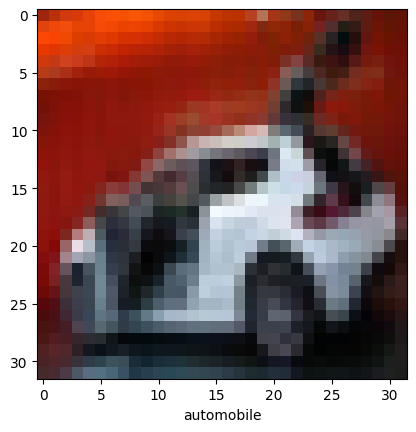

In [40]:
plot_sample(x_test,y_test,6)

In [39]:
classes[y_pred_classes[6]]

'dog'